In [2]:
import numpy as np

T = 10
states_range = [-10,10]
action_range = [0, 10]
random_demand = [0, 10]
to_add = 10

p=4
a,b=5,5

Demand = [np.random.randint(random_demand[0], random_demand[1]) for _ in range(T + 10)]


def h(X):
    if X >= 0:
        return a * X
    else:
        return -b * X

def check(state):
    return states_range[0] <= state < states_range[1]

def cost(X, U):
    return h(X) + p * U

# Initialization
V = np.zeros((T+1 , states_range[1] - states_range[0] + 1))
policy = np.zeros((T, states_range[1] - states_range[0] + 1), dtype=int)

# Policy iteration
for _ in range(1000000):
    # Policy Evaluation
    for s in range(states_range[0], states_range[1] + 1):
       V[T][s + to_add] = h(s)  

    for t in range(T-1, -1, -1):
        for X in range(states_range[0], states_range[1] + 1):
            U = policy[t][X + to_add]
            # next_state = X + U - np.random.randint(random_demand[0], random_demand[1])
            next_state = X+U-Demand[t]

            next_state = X+U
            if check(next_state):
                V[t][X + to_add] = cost(next_state, U) + V[t + 1][next_state + to_add]

    # Policy Improvement
    policy_stable = True
    for t in range(T):
        for X in range(states_range[0], states_range[1] + 1):
            min_cost = float('inf')
            best_action = None
            for U in range(action_range[0], action_range[1] + 1):
                next_state = X + U - np.random.randint(random_demand[0], random_demand[1] + 1)
                if check(next_state):
                    temp_cost = cost(next_state, U) + V[t + 1][next_state + to_add]
                    if temp_cost < min_cost:
                        min_cost = temp_cost
                        best_action = U
            if best_action is not None and policy[t][X + to_add] != best_action:
                policy_stable = False
                policy[t][X + to_add] = best_action

    if policy_stable:
        break

In [1]:
from prettytable import PrettyTable

table = PrettyTable()

col_labels = list( range(states_range[0], states_range[1] + 1))
table.field_names = [""] + col_labels

row_labels = list( range(T) )
for i in range(len(row_labels)):
    tmp = policy[i].tolist()
    tmp = [row_labels[i]] + tmp
    table.add_row(tmp)

# Print the table
print(table)

+----+-----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+---+---+----+----+
|    | -10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 | 0 | 1 | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
+----+-----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+---+---+----+----+
| 0  |  10 | 10 | 9  | 8  | 7  | 6  | 5  | 4  | 3  | 2  | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0  | 0  |
| 1  |  10 | 10 | 9  | 8  | 7  | 6  | 5  | 4  | 3  | 2  | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0  | 0  |
| 2  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8  | 7  | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0 | 0 | 0 | 0  | 0  |
| 3  |  10 | 10 | 10 | 9  | 8  | 7  | 6  | 5  | 4  | 3  | 2 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0  | 0  |
| 4  |  10 | 10 | 10 | 10 | 9  | 8  | 7  | 6  | 5  | 4  | 3 | 2 | 1 | 0 | 0 | 0 | 0 | 0 | 0 | 0 | 0  | 0  |
| 5  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0  | 0  |
| 6  |  10 | 10 | 10 | 10 | 

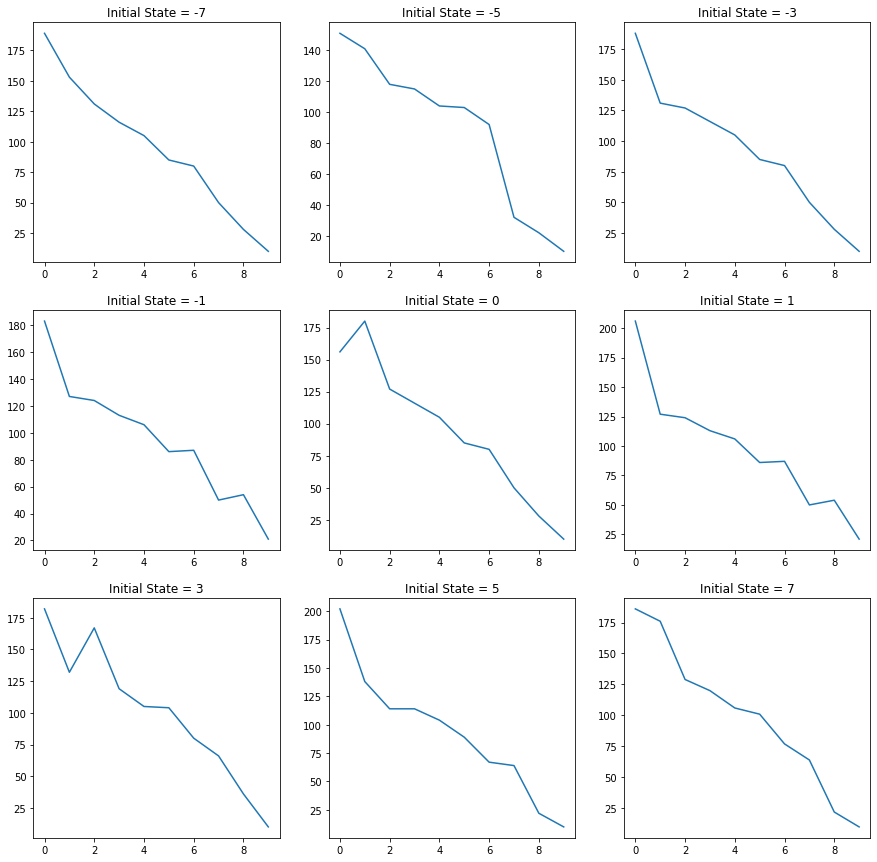

In [14]:
import matplotlib.pyplot as plt

states = [-7, -5, -3 , -1, 0, 1, 3, 5, 7]
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
ptr = 0
for i in range(3):
    for j in range(3):
        curr = states[ptr]
        costs = []
        t = 0
        while(t<T):
            next_state = curr+int(policy[t][curr+to_add])-Demand[t]
            next_state = max(next_state, states_range[0])
            next_state = min(next_state, states_range[1])
            cost = h(next_state)+p*int(policy[t][curr+to_add])
            costs.append(V[t][curr+to_add])
            curr=next_state
            t+=1
        axs[i, j].plot(range(0,T),costs)
        axs[i, j].set_title('Initial State = ' + str(states[ptr]))
        ptr+=1
plt.show()